# Plot the power spectrum of LIGO data

## Fig 10.6

In [21]:
"""
Plot the power spectrum of LIGO data
------------------------------------
Figure 10.6

LIGO data and its noise power spectrum. The upper panel shows a 2-second-long
stretch of data (~8000 points; essentially noise without signal) from LIGO
Hanford. The middle and bottom panels show the power spectral density computed
for 2048 seconds of data, sampled at 4096 Hz (~8 million data values). The gray
line shows the PSD computed using a naive FFT approach; the dark line uses
Welch's method of overlapping windows to smooth noise; the middle panel uses a
1-second-wide top-hat window and the bottom panel the so-called Hanning
(cosine) window with the same width.
"""


"\nPlot the power spectrum of LIGO data\n------------------------------------\nFigure 10.6\n\nLIGO data and its noise power spectrum. The upper panel shows a 2-second-long\nstretch of data (~8000 points; essentially noise without signal) from LIGO\nHanford. The middle and bottom panels show the power spectral density computed\nfor 2048 seconds of data, sampled at 4096 Hz (~8 million data values). The gray\nline shows the PSD computed using a naive FFT approach; the dark line uses\nWelch's method of overlapping windows to smooth noise; the middle panel uses a\n1-second-wide top-hat window and the bottom panel the so-called Hanning\n(cosine) window with the same width.\n"

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
from matplotlib import mlab

from astroML.datasets import fetch_LIGO_large


In [23]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [24]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [25]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [26]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Fetch the LIGO hanford data

In [27]:
#------------------------------------------------------------
# Fetch the LIGO hanford data
data, dt = fetch_LIGO_large()

# subset of the data to plot
t0 = 646
T = 2
tplot = dt * np.arange(T * 4096)
dplot = data[4096 * t0: 4096 * (t0 + T)]

tplot = tplot[::10]
dplot = dplot[::10]

fmin = 40
fmax = 2060

# compute PSD using simple FFT

In [28]:
#------------------------------------------------------------
# compute PSD using simple FFT
N = len(data)
df = 1. / (N * dt)
PSD = abs(dt * fftpack.fft(data)[:N // 2]) ** 2
f = df * np.arange(N / 2)

cutoff = ((f >= fmin) & (f <= fmax))
f = f[cutoff]
PSD = PSD[cutoff]
f = f[::100]
PSD = PSD[::100]


# compute PSD using Welch's method -- no window function

In [29]:
#------------------------------------------------------------
# compute PSD using Welch's method -- no window function
PSDW1, fW1 = mlab.psd(data, NFFT=4096, Fs=1. / dt,
                      window=mlab.window_none, noverlap=2048)

dfW1 = fW1[1] - fW1[0]

cutoff = (fW1 >= fmin) & (fW1 <= fmax)
fW1 = fW1[cutoff]
PSDW1 = PSDW1[cutoff]


# compute PSD using Welch's method -- hanning window function

In [30]:
#------------------------------------------------------------
# compute PSD using Welch's method -- hanning window function
PSDW2, fW2 = mlab.psd(data, NFFT=4096, Fs=1. / dt,
                      window=mlab.window_hanning, noverlap=2048)

dfW2 = fW2[1] - fW2[0]

cutoff = (fW2 >= fmin) & (fW2 <= fmax)
fW2 = fW2[cutoff]
PSDW2 = PSDW2[cutoff]


# Plot the data

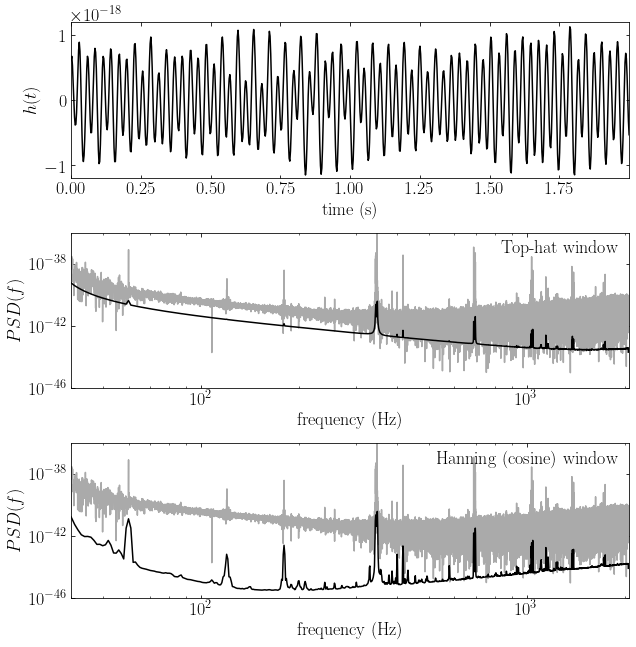

In [31]:
#------------------------------------------------------------
# Plot the data
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.1, top=0.9, hspace=0.35)

# top panel: time series
ax = fig.add_subplot(311)
ax.plot(tplot, dplot, '-k')
ax.set_xlabel('time (s)')
ax.set_ylabel('$h(t)$')

ax.set_ylim(-1.2E-18, 1.2E-18)

# middle panel: non-windowed filter
ax = fig.add_subplot(312)
ax.loglog(f, PSD, '-', c='#AAAAAA')
ax.loglog(fW1, PSDW1, '-k')
ax.text(0.98, 0.95, "Top-hat window",
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlabel('frequency (Hz)')
ax.set_ylabel(r'$PSD(f)$')

ax.set_xlim(40, 2060)
ax.set_ylim(1E-46, 1E-36)
ax.yaxis.set_major_locator(plt.LogLocator(base=100))

# bottom panel: hanning window
ax = fig.add_subplot(313)
ax.loglog(f, PSD, '-', c='#AAAAAA')
ax.loglog(fW2, PSDW2, '-k')
ax.text(0.98, 0.95, "Hanning (cosine) window",
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlabel('frequency (Hz)')
ax.set_ylabel(r'$PSD(f)$')

ax.set_xlim(40, 2060)
ax.set_ylim(1E-46, 1E-36)
ax.yaxis.set_major_locator(plt.LogLocator(base=100))

plt.show()
